In [5]:
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'grid.color': 'black', 'grid.linewidth':1})
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [43]:
pathforPK = "../data/nt01230a.z"
pathfordata = "../data/Kimberlite-2015-07-17.xls"

# #windows
# pathforPK = "..\\data\\nt01222a.z"
# pathfordata = "..\\data\\Kimberlite-2015-07-17.xls"

temp = np.loadtxt(pathforPK, skiprows=11, delimiter=",")
data = pd.read_excel(pathfordata)
data_active = data.loc[np.logical_and((data['Facies'] == 'XVK')|(data['Facies'] == 'PK')|(data['Facies'] == 'HK')|(data['Facies'] == 'VK'), data.notnull()['Rinf']==True)][["Facies", "0LabID (PCG)", "Peregrine ID", "(Latitude)", "(Longitude)", "Depth (m)","Mag Susc [SI]","Resistivity [Ohm.m]","Geometric Factor [m]","Sat Geometric Dens [g/cc]","Chargeability [ms]","Rinf","Linf","Ro","Rh","Qh","Ph", "Fh","pRh", "pQh","Rm","Qm","Pm", "Fm","pRm", "pQm","Rl","Ql","Pl", "Fl", "pRl", "pQl","Re","Qe","Pe-f","Pe-i"]]

In [44]:
path = "../data/HVC2014_10Grenon/"
fnameobs = "BC13911A 2014-10-29.z"

fnamepred = "HVC 2014-10-27simplified.csv"
pathobs = path+fnameobs
pathpred = path+fnamepred

tempHVC = np.loadtxt(pathobs, skiprows=11, delimiter=",")
dataHVC = pd.read_csv(pathpred)
data_activeHVC = dataHVC.loc[np.logical_and(dataHVC["Fl"]<100., dataHVC["Fm"]<1.)]

In [45]:
# data_activeHVC

In [46]:
def readfun(data, labid):
    Linf = data[data['file'] == labid]['Linf'].values[0]

    Rinf = data[data['file'] == labid]['Rinf'].values[0]
    Rh = data[data['file'] == labid]['Rh'].values[0]
    Ph = data[data['file'] == labid]['Ph'].values[0]
    Fh = data[data['file'] == labid]['Fh'].values[0]

    Rm = data[data['file'] == labid]['Rm'].values[0]
    Pm = data[data['file'] == labid]['Pm'].values[0]
    Fm = data[data['file'] == labid]['Fm'].values[0]

    Rl = data[data['file'] == labid]['Rl'].values[0]
    Pl = data[data['file'] == labid]['Pl'].values[0]
    Fl = data[data['file'] == labid]['Fl'].values[0]

    Re = data[data['file'] == labid]['Re'].values[0]
    Qe = data[data['file'] == labid]['Qe'].values[0]

    Pef = data[data['file'] == labid]['Pe-f'].values[0]
    Pei = data[data['file'] == labid]['Pe-i'].values[0]
    return Linf, Rinf, Rh, Fh, Ph, Rl, Fl, Pl, Rm, Fm, Pm, Re, Qe, Pef, Pei

In [47]:
# data_active[data['Facies'] == 'XVK']

In [48]:
labid = 'NT01230'
Linf = data_active[data['0LabID (PCG)'] == labid]['Linf'].values[0]

Ro = data_active[data['0LabID (PCG)'] == labid]['Ro'].values[0]

Rinf = data_active[data['0LabID (PCG)'] == labid]['Rinf'].values[0]
Rh = data_active[data['0LabID (PCG)'] == labid]['Rh'].values[0]
Qh = data_active[data['0LabID (PCG)'] == labid]['Qh'].values[0]
Ph = data_active[data['0LabID (PCG)'] == labid]['Ph'].values[0]
Fh = data_active[data['0LabID (PCG)'] == labid]['Fh'].values[0]

Rm = data_active[data['0LabID (PCG)'] == labid]['Rm'].values[0]
Qm = data_active[data['0LabID (PCG)'] == labid]['Qm'].values[0]
Pm = data_active[data['0LabID (PCG)'] == labid]['Pm'].values[0]
Fm = data_active[data['0LabID (PCG)'] == labid]['Fm'].values[0]

Rl = data_active[data['0LabID (PCG)'] == labid]['Rl'].values[0]
Ql = data_active[data['0LabID (PCG)'] == labid]['Ql'].values[0]
Pl = data_active[data['0LabID (PCG)'] == labid]['Pl'].values[0]
Fl = data_active[data['0LabID (PCG)'] == labid]['Fl'].values[0]

Re = data_active[data['0LabID (PCG)'] == labid]['Re'].values[0]
Qe = data_active[data['0LabID (PCG)'] == labid]['Qe'].values[0]

Pef = data_active[data['0LabID (PCG)'] == labid]['Pe-f'].values[0]
Pei = data_active[data['0LabID (PCG)'] == labid]['Pe-i'].values[0]

In [49]:
# pRinf = 1./(1./Ro+1./zarc.pRl)
# m = (Ro-pRinf) / Ro
# tau = (Ro*zarc.pQl/m)**(1./zarc.Pl)
# print (Ro, pRinf, m, tau, Pl)

In [50]:
import sys 
#windows
# sys.path.append("..\\codes\\")
sys.path.append("../codes/")
from Zarcfit import *

In [51]:
def plotAmpPhaseHM(obs, predS, predH, predM, predE, frequency):
    matplotlib.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize = (12, 5))
    amp = np.sqrt(obs.real**2+obs.imag**2)
    amp_predS = np.sqrt(predS.real**2+predS.imag**2)
    amp_predH = np.sqrt(predH.real**2+predH.imag**2)
    amp_predM = np.sqrt(predM.real**2+predM.imag**2)
    amp_predE = np.sqrt(predE.real**2+predE.imag**2)
    
    phase = np.angle(obs, deg=True)
    phase_predS = np.angle(predS, deg=True)
    phase_predH = np.angle(predH, deg=True)    
    phase_predM = np.angle(predM, deg=True) 
    phase_predE = np.angle(predE, deg=True)     
    
    ax = plt.subplot(121)
    ax1 = plt.subplot(122)
#     ax.patch.set_facecolor('black')
#     ax1.patch.set_facecolor('black')
    ax.plot(frequency, amp, 'k-', lw=3)
    ax.plot(frequency, amp_predS, 'ko', ms=4)
#     ax.plot(frequency, amp_predH, 'r-', lw=2)
    ax.plot(frequency, amp_predM, 'b*', lw=2, ms = 10)
#     ax.plot(frequency, amp_predE, 'k-', lw=1)    
    
    ax.set_xscale('log')
    ax.set_yscale('linear')        
    ax1.plot(frequency, -phase, 'k-', lw=3)
    ax1.plot(frequency, -phase_predS, 'ko', ms=4)
#     ax1.plot(frequency, -phase_predH, 'r-', lw=2)
    ax1.plot(frequency, -phase_predM, 'b*', lw=2, ms = 10)
#     ax1.plot(frequency, -phase_predE, 'k-', lw=1)    
    ax1.set_xscale('log')
    ax1.set_yscale('log')        
    ax1.set_ylim(1e-1, 100)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("|Z| (Ohm)")
    ax1.set_xlabel("Frequency")
    ax1.set_ylabel("Phase (degree)")
    ax.grid(True)
    ax.yaxis.grid(True, which='minor')
    plt.tick_params(axis='y', which='minor')
    ax1.grid(True)
    ax1.yaxis.grid(True, which='minor')
    plt.tick_params(axis='y', which='minor')
    leg = ax1.legend(("Observed", "Predicted", "IP from rock"), fontsize = 16, bbox_to_anchor = (1.6, 1))
#     leg = ax1.legend(("Observed", "R0,Zh,Zl,Ze", "R0,Zh", "R0,Zl", "R0,Ze"), fontsize = 12, bbox_to_anchor = (1.6, 1))

    plt.show()
    return

In [52]:
def plotRealImagHM(obs, predS, predH, predM, predE, frequency):
    matplotlib.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize = (12, 5))    
    ax = plt.subplot(121)
    ax1 = plt.subplot(122)
    ax.patch.set_facecolor('white')
    ax1.patch.set_facecolor('white')
    ax.plot(frequency, obs.real, 'black', lw=4, marker=".", ms=8)
    ax.plot(frequency, predS.real, 'deepskyblue', lw=2)
    ax.plot(frequency, predH.real, 'r-', lw=2)
    ax.plot(frequency, predM.real, 'b-', lw=2)
#     ax.plot(frequency, predE.real, 'k-', lw=1)
    
    ax.set_xscale('log')
    ax.set_yscale('linear')        
    ax1.plot(frequency, -obs.imag, 'black', lw=4, marker=".", ms=8)
    ax1.plot(frequency, -predS.imag, 'deepskyblue', lw=2)
    ax1.plot(frequency, -predH.imag, 'r-', lw=2)
    ax1.plot(frequency, -predM.imag, 'b-', lw=2)
#     ax1.plot(frequency, -predE.imag, 'k-', lw=1)    
    ax1.set_xscale('log')
    ax1.set_yscale('log')        
#     ax1.set_ylim(1e1, 1e3)
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Real impedance (Ohm)")
    ax1.set_xlabel("Frequency")
    ax1.set_ylabel("-Imaginary impedance (Ohm)")
    ax.grid(True)
    ax.yaxis.grid(True, which='minor')
    plt.tick_params(axis='y', which='minor')
    ax1.grid(True)
    ax1.yaxis.grid(True, which='minor')
    plt.tick_params(axis='y', which='minor')
    leg = ax1.legend(("Observed", "R0,Zh,Zl,Ze", "R0,Zh", "R0,Zl", "R0,Ze"), fontsize = 14, bbox_to_anchor = (1.6, 1))
    
    plt.show()
    return

In [53]:
parallel = lambda Ro, z: 1./(1./Ro+1./z)

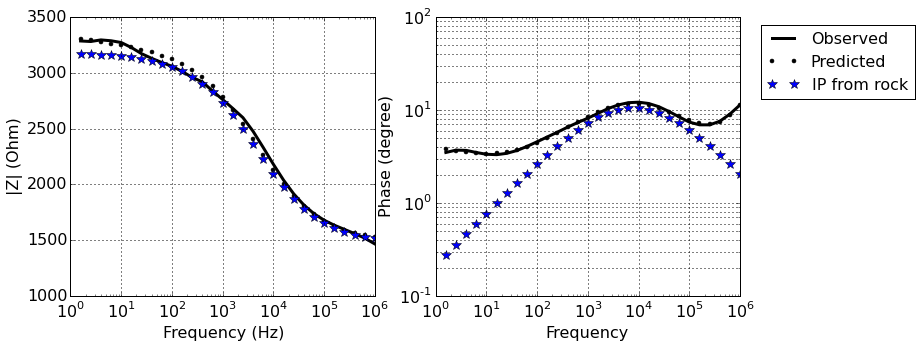

In [54]:
actfreq = temp[:,0] > 1
# observed impedance
obs = temp[actfreq,4]+1j*temp[actfreq,5]
# frequency
frequency = temp[actfreq,0].copy()
# Initiate Zarfit
zarc = Zarcfit(obs, frequency)
zarc.SetParametersSeries(Linf, Rinf, Rh, Fh, Ph, Rl, Fl, Pl, Rm, Fm, Pm, Re, Qe, Pef, Pei)
predS = zarc.Zseries(frequency)
predH = zarc.Zh.copy()
predM = zarc.Zm.copy()
predL = zarc.Zl.copy()
predE = zarc.Ze.copy()
predP = zarc.Zparallel(frequency)
plotAmpPhaseHM(obs, predP, parallel(Ro, zarc.pZh), parallel(Ro, zarc.pZl), parallel(Ro, zarc.Ze), frequency)

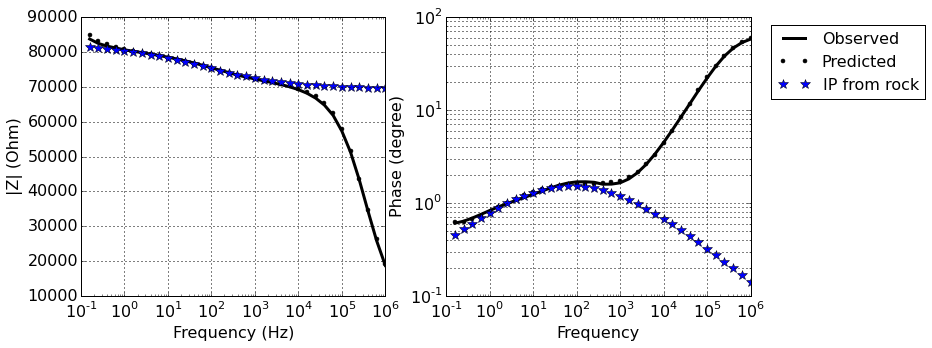

In [55]:
actfreq = temp[:,0] > 0.1
Linf, Rinf, Rh, Fh, Ph, Rl, Fl, Pl, Rm, Fm, Pm, Re, Qe, Pef, Pei =readfun(data_activeHVC,fnameobs)
# observed impedance
obs = tempHVC[actfreq,4]+1j*tempHVC[actfreq,5]
# frequency
frequency = tempHVC[actfreq,0].copy()
# Initiate Zarfit
zarcHVC = Zarcfit(obs, frequency)
zarcHVC.SetParametersSeries(Linf, Rinf, Rh, Fh, Ph, Rl, Fl, Pl, Rm, Fm, Pm, Re, Qe, Pef, Pei)
predS = zarcHVC.Zseries(frequency)
predH = zarcHVC.Zh.copy()
predM = zarcHVC.Zm.copy()
predL = zarcHVC.Zl.copy()
predE = zarcHVC.Ze.copy()
predP = zarcHVC.Zparallel(frequency)
plotAmpPhaseHM(obs, predP, parallel(zarcHVC.R0,zarcHVC.pZh), parallel(zarcHVC.R0,zarcHVC.pZl), parallel(zarcHVC.R0,zarcHVC.Ze), frequency)

In [223]:
pRinf = 1./(1./zarcHVC.R0+1./zarcHVC.pRl)
m = (zarcHVC.R0-pRinf) / zarcHVC.R0
tau = (zarcHVC.R0*zarcHVC.pQl/m)**(1./zarcHVC.Pl)
print (zarcHVC.R0, pRinf, m, tau, Pl)

82374.45 69374.45 0.157815924719 0.00258788525353 0.382


In [202]:
# plotRealImagHM(obs, predP, parallel(zarc.pZh), parallel(zarc.pZl), parallel(zarc.Ze), frequency)

In [176]:
zarc.pRl

2725.211102172011

3183 1468.1850035833345 0.5387417519373753 3.9736291011592815e-05 0.382


3183 1468.1850035833345 0.5387417519373753 3.9736291011592815e-05 0.5704


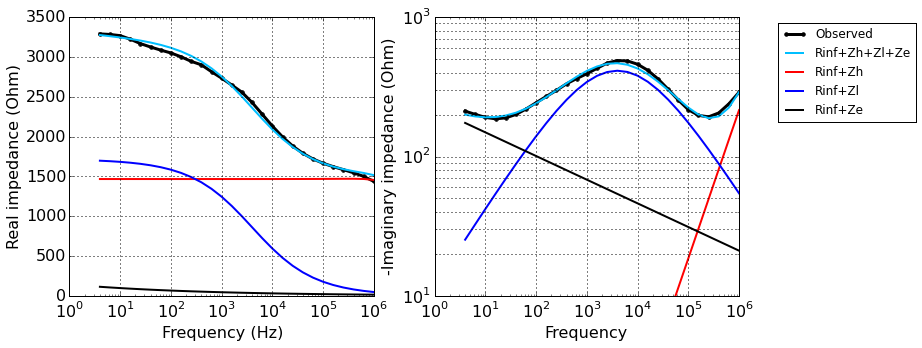

In [164]:
plotRealImagHM(obs, predS, zarc.Zh+zarc.Rinf, zarc.Zl+zarc.Rinf, zarc.Ze+zarc.Rinf, frequency)

In [201]:
def plotZarcdlogZdlogF(obs, predS, predP, frequency):
    fig = plt.figure(figsize = (11, 5))
    amp = np.sqrt(obs.real**2+obs.imag**2)
    amp_predS = np.sqrt(predS.real**2+predS.imag**2)
    amp_predP = np.sqrt(predP.real**2+predP.imag**2)
    ax = plt.subplot(121)
    ax1 = plt.subplot(122)
    ax.patch.set_facecolor('black')
    ax1.patch.set_facecolor('black')
    ax.plot(obs.real, -obs.imag, 'lime', lw=3, marker=".", ms=8)
    ax.plot(predS.real, -predS.imag, 'deepskyblue', lw=2)
    ax.plot(predS.real, -predP.imag, 'b.')
    ax1.semilogx(frequency[1:]*0.5+frequency[0:-1]*0.5, diff(np.log10(amp))/diff(np.log10(frequency)), 'lime', lw=3, marker=".", ms=8)
    ax1.semilogx(frequency[1:]*0.5+frequency[0:-1]*0.5, diff(np.log10(amp_predS))/diff(np.log10(frequency)), 'deepskyblue', lw=2)
    ax1.semilogx(frequency[1:]*0.5+frequency[0:-1]*0.5, diff(np.log10(amp_predP))/diff(np.log10(frequency)), 'b.', lw=2)
    ax.set_xlim(obs.real.min(), obs.real.max())
    ax.set_ylim((-obs.imag).min(), (-obs.imag).max())
    ax.set_xlabel("Real (Ohm)")
    ax.set_ylabel("Frequency (Hz)")
    ax1.set_xlabel("Frequency (Hz)")
    ax1.set_ylabel("dlog(Amp)/dlog(Freq)")
    ax.grid(True)
    ax.yaxis.grid(True, which='minor')
    plt.tick_params(axis='y', which='minor')
    ax1.grid(True)
    ax1.yaxis.grid(True, which='minor')
    plt.tick_params(axis='y', which='minor')
    leg = ax1.legend(("Observed", "Predicted Series", "Predicted Parallel"), fontsize = 12, bbox_to_anchor = (1.6, 1))
    plt.show()
    return

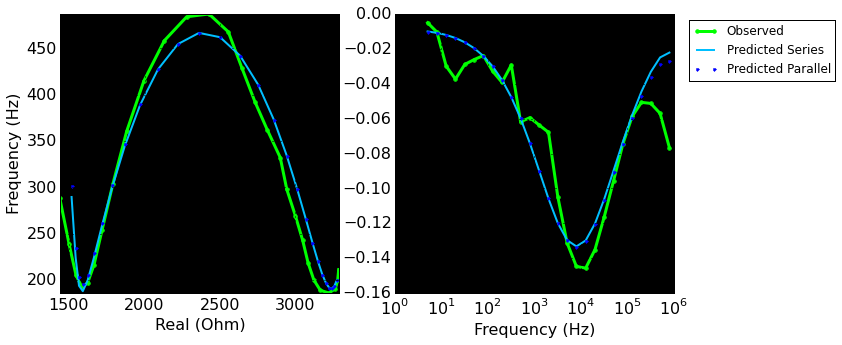

In [202]:
plotZarcdlogZdlogF(obs, predS, predP, frequency)

In [203]:
def plotAmpPhase(obs, predS, predP, frequency):
    matplotlib.rcParams.update({'font.size': 16})
    fig = plt.figure(figsize = (12, 5))
    amp = np.sqrt(obs.real**2+obs.imag**2)
    amp_predS = np.sqrt(predS.real**2+predS.imag**2)
    amp_predP = np.sqrt(predP.real**2+predP.imag**2)
    phase = np.angle(obs, deg=True)
    phase_predS = np.angle(predS, deg=True)
    phase_predP = np.angle(predP, deg=True)    
    ax = plt.subplot(121)
    ax1 = plt.subplot(122)
    ax.patch.set_facecolor('black')
    ax1.patch.set_facecolor('black')
    ax.plot(frequency, amp, 'lime', lw=3, marker=".", ms=8)
    ax.plot(frequency, amp_predS, 'deepskyblue', lw=2)
    ax.plot(frequency, amp_predP, 'b.')
    ax.set_xscale('log')
    ax.set_yscale('linear')        
    ax1.plot(frequency, -phase, 'lime', lw=3, marker=".", ms=8)
    ax1.plot(frequency, -phase_predS, 'deepskyblue', lw=2)
    ax1.plot(frequency, -phase_predP, 'b.')
    ax1.set_xscale('log')
    ax1.set_yscale('log')        
#     ax.set_ylim(amp.min(), amp.max())
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("|Z| (Ohm)")
    ax1.set_xlabel("Frequency")
    ax1.set_ylabel("Phase (degree)")
    ax.grid(True)
    ax.yaxis.grid(True, which='minor')
    plt.tick_params(axis='y', which='minor')
    ax1.grid(True)
    ax1.yaxis.grid(True, which='minor')
    plt.tick_params(axis='y', which='minor')
    leg = ax1.legend(("Observed", "Predicted Series", "Predicted Parallel"), fontsize = 12, bbox_to_anchor = (1.6, 1))
    plt.show()
    return

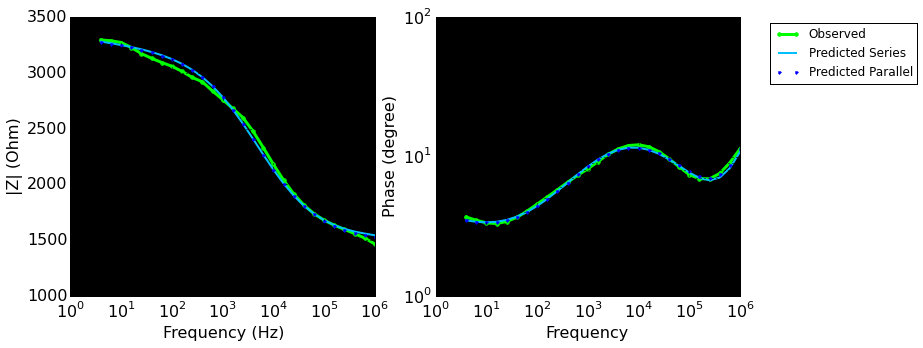

In [206]:
plotAmpPhase(obs, predS, predP, frequency)

In [87]:
Ql

1.801e-06

In [85]:
freq = np.logspace(-3, 6)

In [106]:
out = Zarcfun(Rl, Ql, 0.5, freq)

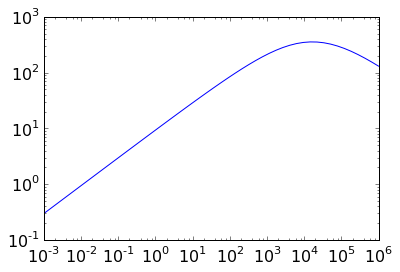

In [110]:
# plt.loglog(freq, -np.angle(out, deg=True))
plt.loglog(freq, -out.imag)